In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/My Uber Drives - 2016.csv")

In [4]:
dataset

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## data preprocessing

In [6]:
dataset['PURPOSE*'].fillna("NOT",inplace=True)

<ipython-input-6-af5787475d9f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE*'].fillna("NOT",inplace=True)


In [7]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [8]:
dataset['START_DATE*']= pd.to_datetime(dataset['START_DATE*'],errors='coerce')
dataset['END_DATE*']= pd.to_datetime(dataset['END_DATE*'],errors='coerce')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1156 non-null   float64       
 6   PURPOSE*     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [10]:
from datetime import datetime

dataset['DATE']=pd.DatetimeIndex(dataset['START_DATE*']).date
dataset['time']=pd.DatetimeIndex(dataset['START_DATE*']).hour

In [11]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DATE,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [12]:
dataset['dayparts']=pd.cut(x=dataset['time'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

In [13]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DATE,time,dayparts
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [14]:
dataset.dropna(inplace=True)

In [15]:
dataset.shape

(1136, 10)

## Data visualization

<Axes: xlabel='count', ylabel='PURPOSE*'>

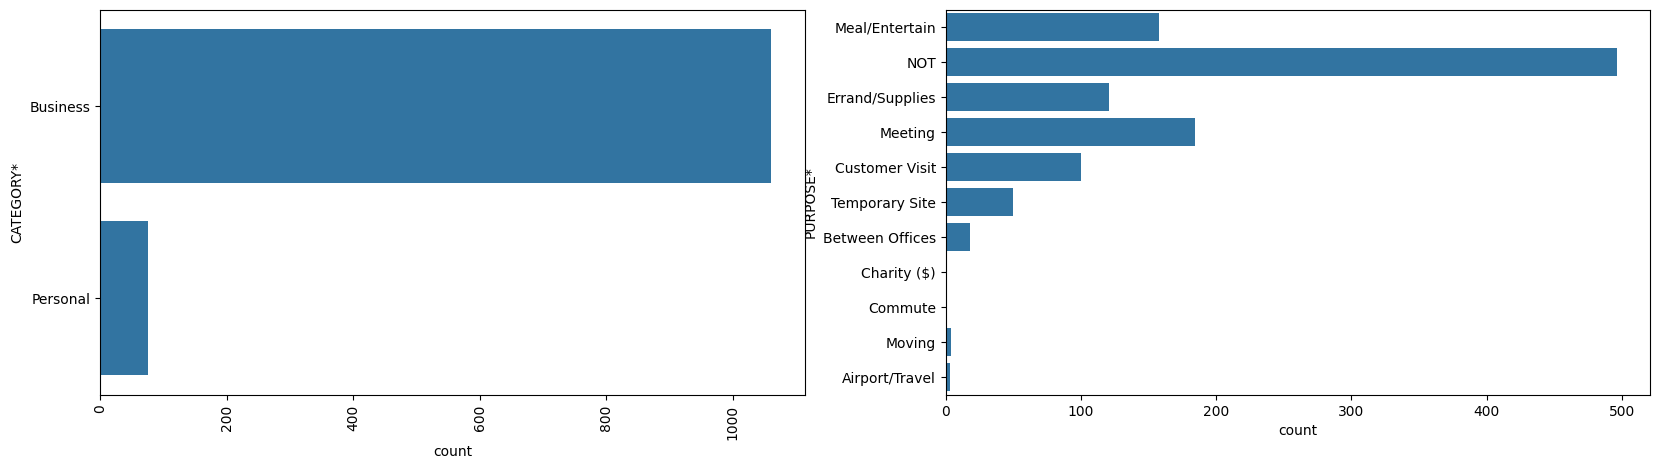

In [16]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)

sns.countplot(dataset['CATEGORY*'])
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE*'])

<Axes: xlabel='count', ylabel='dayparts'>

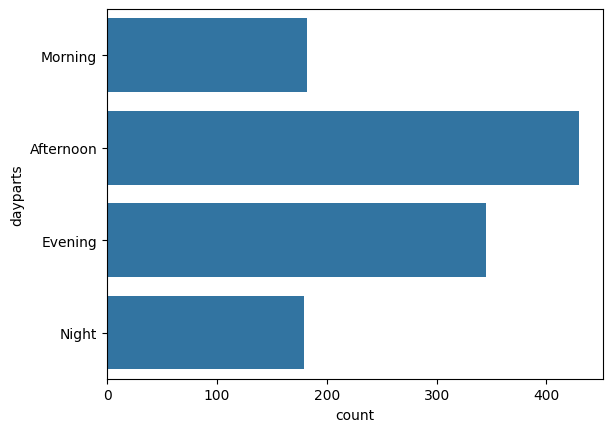

In [17]:
sns.countplot(dataset['dayparts'])

In [24]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE*']).month

month_label={
    1.0:'jan',2.0:'feb',3.0:'march',4.0:'april',5.0:'may',6.0:'june',
    7.0:'july',8.0:'aug',9.0:'sept',10.0:'oct',11.0:'nov',12.0:'dec'
}#assigning string names to the months

dataset['MONTH']=dataset.MONTH.map(month_label)#string names are repalced at the palce of numbers

mon = dataset.MONTH.value_counts(sort=False)

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

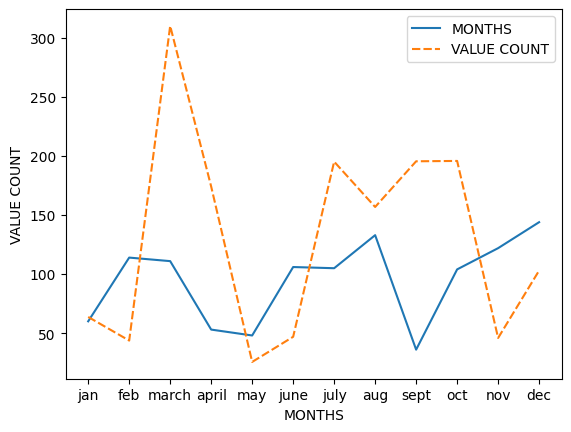

In [25]:
df = pd.DataFrame({
    "MONTHS":mon.values,
    "VALUE COUNT":dataset.groupby('MONTH',sort=False)['MILES*'].max()#max miles of each month
})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS",ylabel="VALUE COUNT")

In [29]:
dataset['DAY']=pd.DatetimeIndex(dataset['DATE']).weekday

day_label={
    0:"Mon",1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'
}

dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

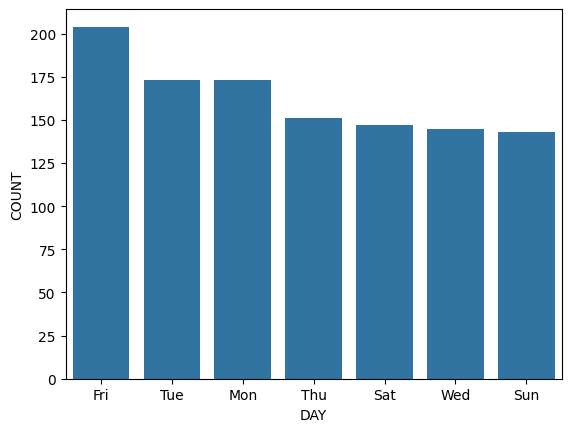

In [30]:
day_label=dataset.DAY.value_counts()

sns.barplot(x=day_label.index,y=day_label)
plt.xlabel("DAY")
plt.ylabel('COUNT')

<Axes: ylabel='MILES*'>

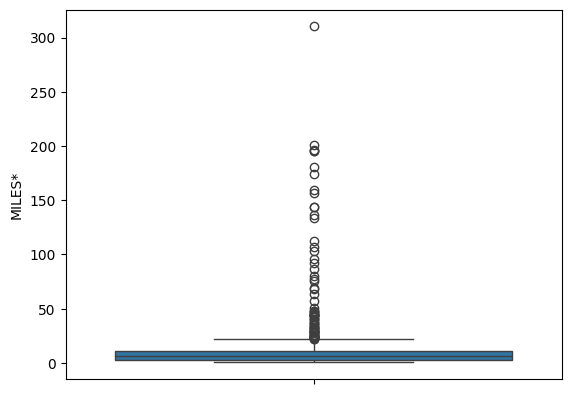

In [32]:
sns.boxplot(dataset['MILES*'])

<Axes: ylabel='MILES*'>

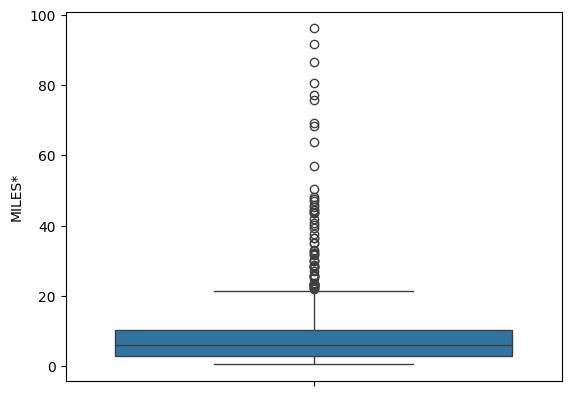

In [33]:
sns.boxplot(dataset[dataset['MILES*']<100]['MILES*'])

<Axes: ylabel='MILES*'>

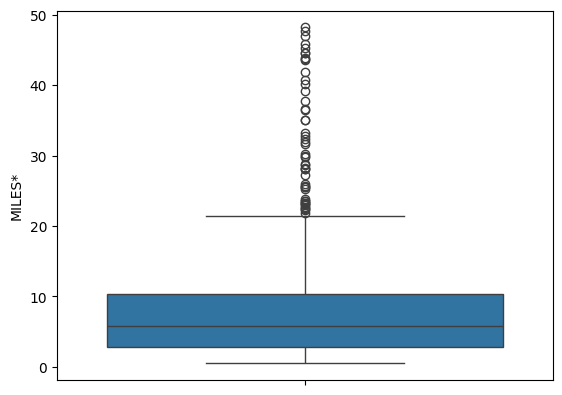

In [34]:
sns.boxplot(dataset[dataset['MILES*']<50]['MILES*'])

<ipython-input-38-d1ae302d2eed>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES*']<40]['MILES*'])


<Axes: xlabel='MILES*', ylabel='Density'>

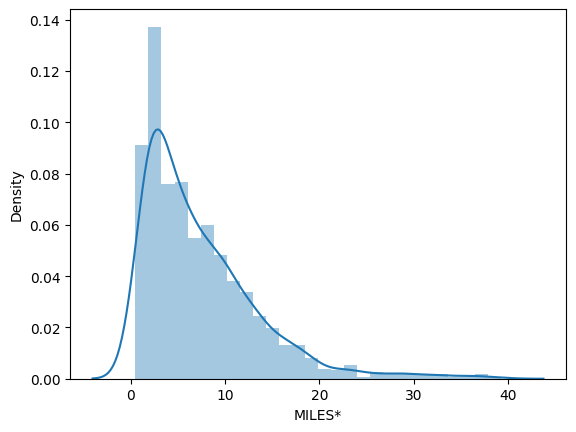

In [38]:
sns.distplot(dataset[dataset['MILES*']<40]['MILES*'])